# **Classification**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
# Part 1: Data Loading and Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Coursework/cancer patient data sets.csv')

# Drop unnecessary columns
df = df.drop(['index', 'Patient Id'], axis=1)

# Encode the target variable (assuming 'Level' is the target)
le = LabelEncoder()
df['Level'] = le.fit_transform(df['Level'])

# Separate features and target
X = df.drop('Level', axis=1)
y = df['Level']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


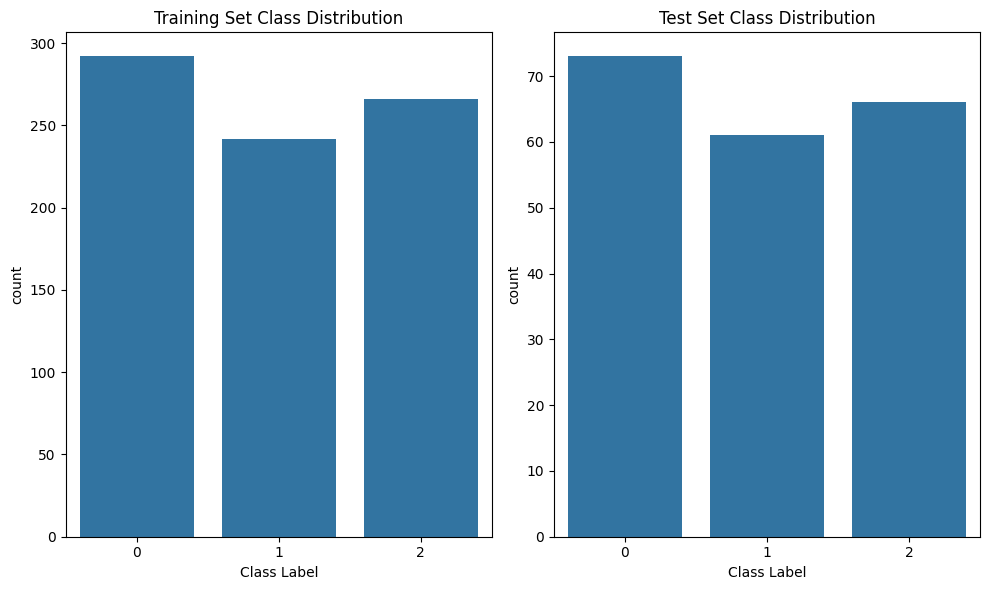

In [4]:

# Visualize class distribution with count plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Training Set Class Distribution')
plt.xlabel('Class Label')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Test Set Class Distribution')
plt.xlabel('Class Label')
plt.tight_layout()
plt.show()



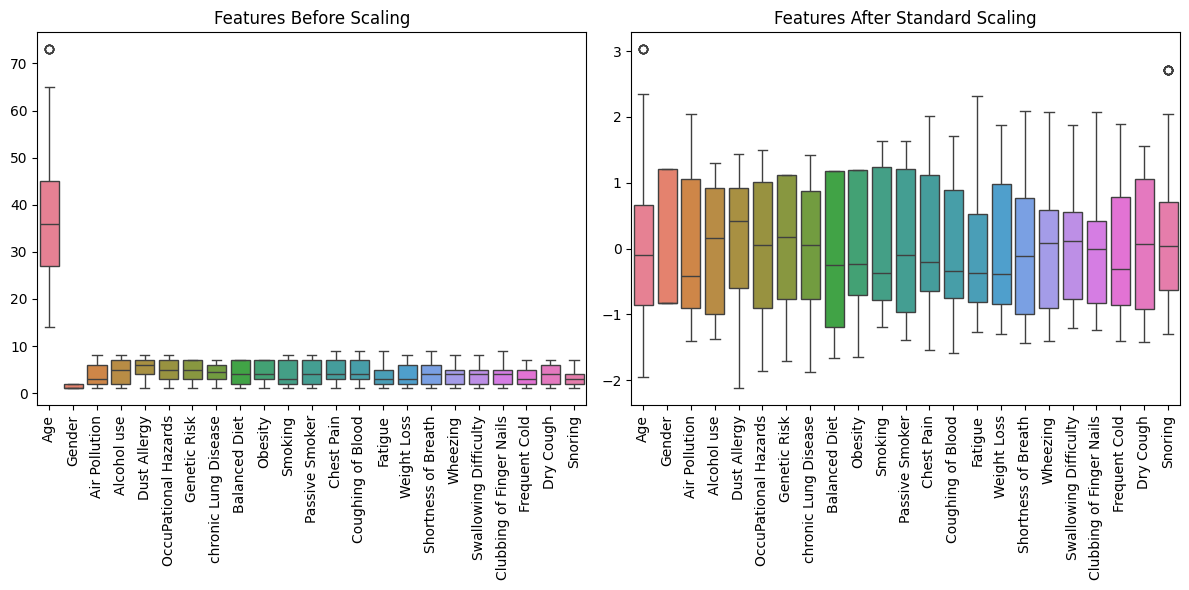

In [10]:
# Part 3: Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize features before and after scaling (boxplots)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Features Before Scaling')
plt.xticks(rotation=90)

# Convert scaled features to DataFrame for plotting
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled_df)
plt.title('Features After Standard Scaling')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:
# Apply Feature Selection Before Hyperparameter Tuning
selector = SelectKBest(f_classif, k=7)  # Select top 7 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# aster Hyperparameter Tuning for Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs']
}
lr_grid = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
    param_distributions=lr_params,
    n_iter=5,
    cv=3,
    n_jobs=-1
)
lr_grid.fit(X_train_selected, y_train)
best_lr_params = lr_grid.best_params_
print("Best Logistic Regression Parameters:", best_lr_params)

# Retrain Logistic Regression with Best Parameters
best_lr = LogisticRegression(**best_lr_params, max_iter=1000, random_state=42)
best_lr.fit(X_train_selected, y_train)

# Cross-Validation Accuracy for Logistic Regression
cv_scores_best_lr = cross_val_score(best_lr, X_train_selected, y_train, cv=3, scoring="accuracy")
print("Tuned Logistic Regression - Cross-Validation Accuracy:", cv_scores_best_lr.mean())


# Faster Hyperparameter Tuning for Random Forest (Prevent Overfitting)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10]
}
rf_grid = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10,
    cv=3,
    n_jobs=-1
)
rf_grid.fit(X_train_selected, y_train)
best_rf_params = rf_grid.best_params_
print("Best Random Forest Parameters:", best_rf_params)

#  Retrain Random Forest with Best Parameters
best_rf = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf.fit(X_train_selected, y_train)

# Cross-Validation Accuracy for Random Forest
cv_scores_best_rf = cross_val_score(best_rf, X_train_selected, y_train, cv=3, scoring="accuracy")
print("Tuned Random Forest - Cross-Validation Accuracy:", cv_scores_best_rf.mean())

# Evaluate on Test Data
y_pred_lr = best_lr.predict(X_test_selected)
y_pred_rf = best_rf.predict(X_test_selected)

print("Final Logistic Regression Accuracy on Test Data:", accuracy_score(y_test, y_pred_lr))
print("Final Random Forest Accuracy on Test Data:", accuracy_score(y_test, y_pred_rf))

Print Classification Reports
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Logistic Regression Parameters: {'solver': 'newton-cg', 'C': 1}
Tuned Logistic Regression - Cross-Validation Accuracy: 0.8350135638722275
Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 10}
Tuned Random Forest - Cross-Validation Accuracy: 1.0
Final Logistic Regression Accuracy on Test Data: 0.875
Final Random Forest Accuracy on Test Data: 1.0
Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       0.83      0.79      0.81        61
           2       0.79      0.85      0.82        66

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00

In [30]:

#  Apply Feature Selection Before Hyperparameter Tuning
selector = SelectKBest(f_classif, k=7)  # Select top 7 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Hyperparameter Tuning for Random Forest (More Restrictive to Prevent Overfitting)
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10],  # ✅ Prevent deep trees
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10]
}

rf_grid = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10,
    cv=3,
    n_jobs=-1
)
rf_grid.fit(X_train_selected, y_train)
best_rf_params = rf_grid.best_params_
print("Best Random Forest Parameters:", best_rf_params)

# Recheck Best Model with Cross-Validation
best_rf = rf_grid.best_estimator_
cv_scores_best_rf = cross_val_score(best_rf, X_train_selected, y_train, cv=3, scoring="accuracy")
print("Tuned Random Forest - Cross-Validation Accuracy:", cv_scores_best_rf.mean())


Best Random Forest Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 10}
Tuned Random Forest - Cross-Validation Accuracy: 1.0



Final Model Accuracy on Test Set: 1.0

Classification Report on Test Set:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        73
      Medium       1.00      1.00      1.00        61
        High       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



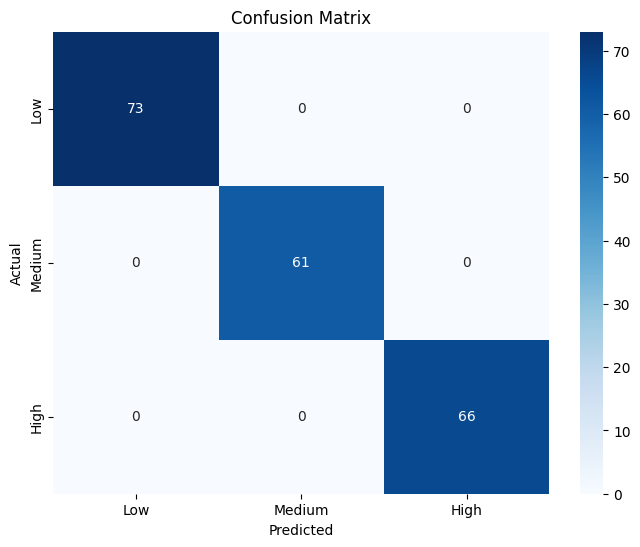

In [33]:
# Use Best Random Forest Model
final_model = rf_grid.best_estimator_
final_model.fit(X_train_selected, y_train)

#  Predict on Test Set
final_pred = final_model.predict(X_test_selected)

#  Evaluate Model
final_accuracy = accuracy_score(y_test, final_pred)
print("\nFinal Model Accuracy on Test Set:", final_accuracy)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, final_pred, target_names=['Low', 'Medium', 'High']))

#  Visualize Confusion Matrix
cm = confusion_matrix(y_test, final_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [32]:
# Step 9: Feature Selection
# Using SelectKBest for feature selection
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected features
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

# Step 10: Build Final Model
best_model = rf_grid.best_estimator_  # Assume RF performed better
best_model.fit(X_train_selected, y_train)
final_pred = best_model.predict(X_test_selected)
print("Final Model Accuracy:", accuracy_score(y_test, final_pred))

# Generate classification report
print(classification_report(y_test, final_pred))

Selected features: ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood']
Final Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [36]:
# Step 9: Feature Selection (Before Scaling)
selector = SelectKBest(f_classif, k=10)  # Select the top 10 best features
X_selected = selector.fit_transform(X, y)  # Apply selection on original dataset

#  Preserve Selected Feature Names
selected_feature_names = X.columns[selector.get_support()]
print("Selected features:", selected_feature_names.tolist())

# Train-Test Split (After Feature Selection)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# Standard Scaling AFTER Feature Selection
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ✅ Fit and transform on train data
X_test_scaled = scaler.transform(X_test)  # ✅ Correctly transform test data


Selected features: ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood']


In [37]:
# Use the best Random Forest model found during hyperparameter tuning
final_model = rf_grid.best_estimator_
final_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
final_pred = final_model.predict(X_test_scaled)

# Evaluate the final model
final_accuracy = accuracy_score(y_test, final_pred)
print("\nFinal Model Accuracy on Test Set:", final_accuracy)

# Print classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, final_pred, target_names=['Low', 'Medium', 'High']))



Final Model Accuracy on Test Set: 1.0

Classification Report on Test Set:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        73
      Medium       1.00      1.00      1.00        61
        High       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

